In [1]:
import os
import pandas as pd
import sys
import time

from PIL import Image
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker

sys.path.append('../../..')
sys.path.append('../../../../ajna_docs/commons')
from ajna_commons.flask.conf import SQL_URI
from ajna_commons.utils.images import mongo_image
from virasana.db import mongodb as db

pd.options.display.float_format = '{:,.1f}'.format


2022-07-13 15:59:18,726 ajna         INFO     Configuração de log efetuada


Fazendo log de erros e alertas no arquivo  ../../../../ajna_docs/commons\ajna_commons\flask\error.log
Fazendo log de atividade no arquivo  ../../../../ajna_docs/commons\ajna_commons\flask\access.log


In [2]:
engine = create_engine(SQL_URI)

In [3]:
Session = sessionmaker(bind=engine)
session = Session()

In [47]:
SQL_BAGAGENS_SANTOS = '''
select c.tipoTrafego, year(c.dataEmissao) as Ano, month(c.DataEmissao) as Mês,  count(distinct i.codigoConteiner) as QtdeCtr
 from conhecimentosresumo c inner join itensresumo i on 
c.numeroCEmercante = i.numeroCEmercante
and c.tipoBLConhecimento in (10, 12)
and i.NCM = '9797'
where c.dataEmissao >= '2020-01-01' and (c.portoOrigemCarga = 'BRSSZ' OR c.portoDestFinal = 'BRSSZ')
group by c.tipoTrafego, year(c.dataEmissao), month(c.DataEmissao)
'''


In [48]:
df_bagagens = pd.read_sql(SQL_BAGAGENS_SANTOS, engine)

In [49]:
impo_2020 = df_bagagens[(df_bagagens.Ano == 2020)  & (df_bagagens.tipoTrafego == '5')]
expo_2020 = df_bagagens[(df_bagagens.Ano == 2020)  & (df_bagagens.tipoTrafego == '7')]

array([<AxesSubplot:xlabel='Mês'>], dtype=object)

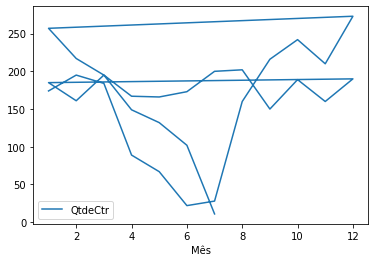

In [50]:
df_bagagens[df_bagagens.tipoTrafego == '5'].plot(y='QtdeCtr', x='Mês', subplots=True, sharex='Ano')

In [51]:
import plotly.graph_objects as go

data = []
for ano in df_bagagens.Ano.unique():
    df_filtered = df_bagagens[(df_bagagens.Ano == ano) & (df_bagagens.tipoTrafego == '5')]
    x = list(df_filtered['Mês'].values)
    y = list(df_filtered.QtdeCtr.values)
    bar = go.Bar(name=str(ano), x=x, y=y)
    data.append(bar)
fig = go.Figure(data=data)
fig.update_layout(title='Qtde Total de Contêineres por ano e mês importação')
fig.show()

In [53]:
data = []
for ano in df_bagagens.Ano.unique():
    df_filtered = df_bagagens[(df_bagagens.Ano == ano) & (df_bagagens.tipoTrafego == '7')]
    x = list(df_filtered['Mês'].values)
    y = list(df_filtered.QtdeCtr.values)
    bar = go.Bar(name=str(ano), x=x, y=y)
    data.append(bar)
fig = go.Figure(data=data)
fig.update_layout(title='Qtde Total de Contêineres por ano e mês exportação')
fig.show()

In [23]:
df_bagagens

,tipoTrafego,Ano,Mês,QtdeCtr
0,5,2020,1,293
1,5,2020,2,280
2,5,2020,3,292
3,5,2020,4,138
4,5,2020,5,99
...,...,...,...,...
57,7,2022,3,200
58,7,2022,4,138
59,7,2022,5,155
60,7,2022,6,211


In [13]:
df_2021_pais = pd.read_sql(SQL_BAGAGENS_SANTOS % 2021, engine)

In [31]:
df_2020_pais['PorCento'] = (df_2020_pais.QtdeCtr / df_2020_pais.QtdeCtr.sum()) * 100

In [32]:
df_2021_pais['PorCento'] = (df_2021_pais.QtdeCtr / df_2021_pais.QtdeCtr.sum()) * 100

In [53]:
df_2020_pais.QtdeCtr.sum()

608368

In [33]:
df_2020_pais.head(20)

,Ano,Pais,QtdeCtr,PorCento
0,2020,CN,81715,13.4
1,2020,US,71682,11.8
2,2020,CO,34683,5.7
3,2020,DE,21785,3.6
4,2020,NL,19880,3.3
5,2020,AR,16197,2.7
6,2020,IT,15905,2.6
7,2020,MX,15844,2.6
8,2020,VN,14027,2.3
9,2020,TR,12608,2.1


In [54]:
df_2021_pais.QtdeCtr.sum()

614961

In [34]:
df_2021_pais.head(20)

,Ano,Pais,QtdeCtr,PorCento
0,2021,US,79309,12.9
1,2021,CN,77279,12.6
2,2021,CO,36457,5.9
3,2021,AR,21220,3.5
4,2021,DE,20006,3.3
5,2021,NL,19974,3.2
6,2021,MX,19548,3.2
7,2021,IT,14853,2.4
8,2021,PE,13881,2.3
9,2021,VN,13502,2.2


In [35]:
df_2020_pais[df_2020_pais.Pais == 'FR']

,Ano,Pais,QtdeCtr,PorCento
36,2020,FR,4350,0.7


In [36]:
df_2021_pais[df_2021_pais.Pais == 'FR']

,Ano,Pais,QtdeCtr,PorCento
35,2021,FR,4104,0.7


In [68]:
SQL_PORTOSEXPORTACAO = '''
select year(c.dataEmissao) as Ano, c.portoDestFinal, count(distinct i.codigoConteiner) as QtdeCtr
 from conhecimentosresumo c inner join itensresumo i on 
c.numeroCEmercante = i.numeroCEmercante
and c.tipoBLConhecimento in (10, 12)
and c.tipoTrafego = 7
where year(c.dataEmissao) = %s  and c.portoOrigemCarga = 'BRSSZ' 
and substr(c.portoDestFinal, 1, 2) not in ('CN', 'US', 'CO', 'AR', 'MX')
group by year(c.dataEmissao), c.portoDestFinal
order by QtdeCtr DESC
'''

In [69]:
df_2020_portos = pd.read_sql(SQL_PORTOSEXPORTACAO % 2020, engine)

In [70]:
df_2021_portos = pd.read_sql(SQL_PORTOSEXPORTACAO % 2021, engine)

In [71]:
df_2020_portos.head(20)

,Ano,portoDestFinal,QtdeCtr
0,2020,NLRTM,19880
1,2020,DEHAM,17954
2,2020,SGSIN,12577
3,2020,BEANR,11877
4,2020,HKHKG,11488
5,2020,PECLL,10380
6,2020,BDCGP,9865
7,2020,CLSAI,9546
8,2020,ITGOA,9111
9,2020,PKBQM,8879


In [72]:
df_2021_portos.head(20)

,Ano,portoDestFinal,QtdeCtr
0,2021,NLRTM,19974
1,2021,DEHAM,16970
2,2021,PECLL,13862
3,2021,BEANR,12413
4,2021,SGSIN,10817
5,2021,BDCGP,10620
6,2021,CLSAI,9804
7,2021,HKHKG,9638
8,2021,KRPUS,9283
9,2021,GHTEM,8655


In [75]:
print(df_2020_portos[df_2020_portos.portoDestFinal.str.startswith('FR')].QtdeCtr.sum())
df_2020_portos[df_2020_portos.portoDestFinal.str.startswith('FR')]

4353


,Ano,portoDestFinal,QtdeCtr
36,2020,FRLEH,2606
73,2020,FRFOS,1143
146,2020,FRMTX,375
222,2020,FRDKK,124
245,2020,FRBAS,88
338,2020,FRBES,15
429,2020,FRMRS,1
528,2020,FRLPE,1


In [74]:
df_2021_portos[df_2021_portos.portoDestFinal.str.startswith('FR')]

,Ano,portoDestFinal,QtdeCtr
40,2021,FRLEH,2489
65,2021,FRFOS,1244
199,2021,FRMTX,177
219,2021,FRBAS,132
299,2021,FRMRS,36
329,2021,FRDKK,21
395,2021,FRBES,6
464,2021,FRLPE,1
